Number of samples: 2962
Speech feature shape: (2962, 52)
Text feature shape: (29711, 66)
Embedding matrix shape: (17688, 100)
Any missing in Speech Features: 0
Any missing in Text Features: 0


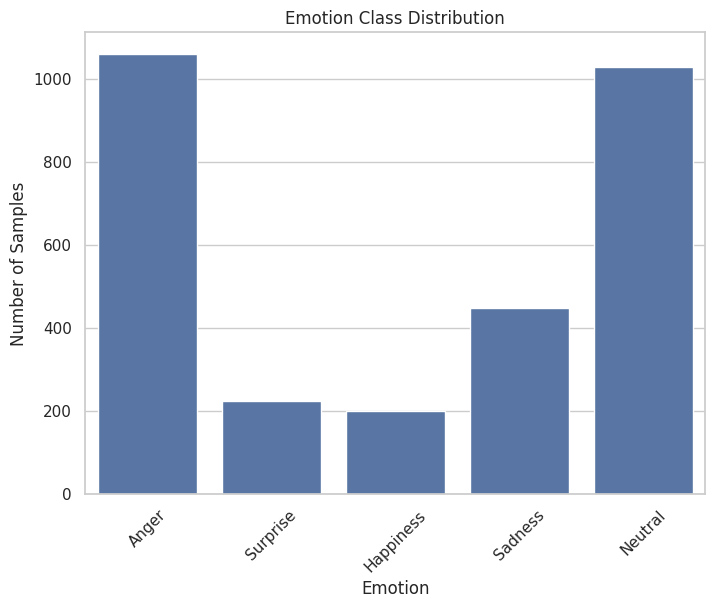


Example of a Speech Feature Vector:
[-0.9643077  -0.82222098 -1.10440248 -1.01618806 -0.31919697 -0.77946356
  0.13138891  0.75378899  1.47459167  0.29672464  0.26250662  0.98554888
 -0.41008734  0.33759742  2.63258578 -2.06540489 -0.28294829  0.31231959
 -1.01779971  1.36976238  0.64439183  0.54354765  0.04243704 -0.53293079
 -1.2835908  -1.84885712 -0.0915395  -0.61995559  1.5959329  -0.54083356
  1.41596982 -0.28009739  1.52833438 -0.26801578  0.6888187  -1.51504447
 -1.2156066  -1.06389941 -0.93887601 -1.0034087  -0.23616271 -0.51719238
 -0.36948767 -0.00616336 -1.47377381 -1.05429798 -1.30678729 -0.84040312
 -0.90839106 -1.03666291 -1.23327304 -0.85606772]

Example of a Text Token Sequence:
[ 2100  2595 13231   942  6321  3883  3616  2228 15011  8368 17042  6590
  6020  6460  7575 13014     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
  

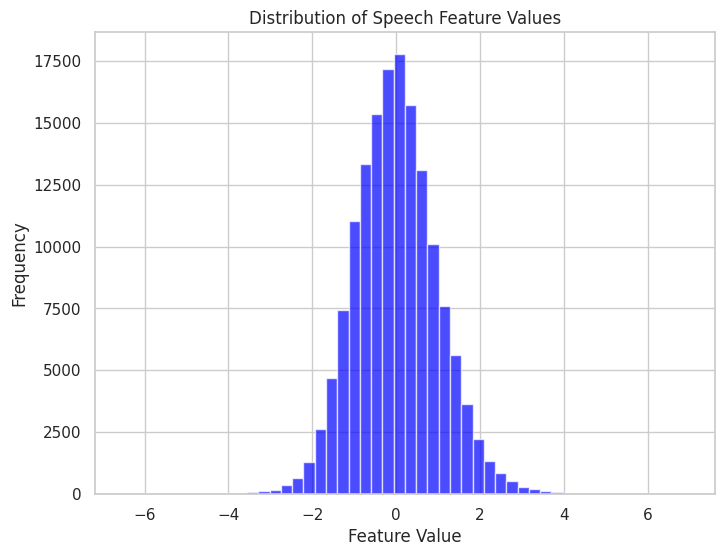

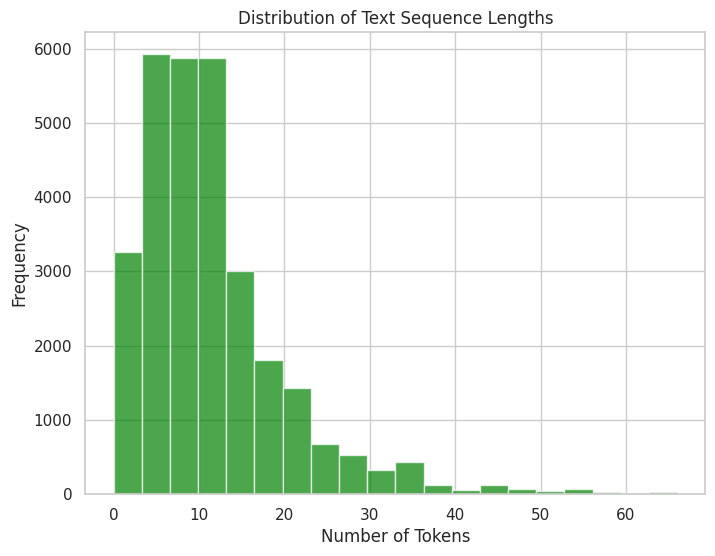


 EDA Completed Successfully.
No major issues detected in the datasets. Ready for modeling!


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

y = np.load('files/labels.npy')
X_speech = np.load('files/selected_features_data.npy')
X_text = np.load('files/padded_docs.npy')
embedding_matrix = np.load('files/embedding_matrix.npy')

print(f"Number of samples: {len(y)}")
print(f"Speech feature shape: {X_speech.shape}")
print(f"Text feature shape: {X_text.shape}")
print(f"Embedding matrix shape: {embedding_matrix.shape}")

print(f"Any missing in Speech Features: {np.isnan(X_speech).sum()}")
print(f"Any missing in Text Features: {np.isnan(X_text).sum()}")

unique_classes, class_counts = np.unique(y, return_counts=True)
class_labels = ['Anger', 'Surprise', 'Happiness', 'Sadness', 'Neutral']

plt.figure(figsize=(8,6))
sns.barplot(x=class_labels, y=class_counts)
plt.title('Emotion Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

print("\nExample of a Speech Feature Vector:")
print(X_speech[0])

print("\nExample of a Text Token Sequence:")
print(X_text[0])

plt.figure(figsize=(8,6))
plt.hist(X_speech.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Speech Feature Values')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

sequence_lengths = np.sum(X_text != 0, axis=1)
plt.figure(figsize=(8,6))
plt.hist(sequence_lengths, bins=20, color='green', alpha=0.7)
plt.title('Distribution of Text Sequence Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

print("\n EDA Completed Successfully.")
print("No major issues detected in the datasets. Ready for modeling!")